In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Create dummy variable
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [5]:
#Concatenate data frames
X=pd.concat([X,geography,gender],axis=1)

In [6]:
#Drop unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [21]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#classifier.add(Dropout(0.3))

classifier.add(Dense(units = 3, kernel_initializer = 'he_uniform',activation='relu'))
#classifier.add(Dropout(0.4))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
#classifier.add(Dropout(0.2))

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)


Epoch 1/10
536/536 [==============================] - 2s 2ms/step - loss: 0.8726 - accuracy: 0.5072 - val_loss: 0.6286 - val_accuracy: 0.6929
Epoch 2/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5862 - accuracy: 0.7339 - val_loss: 0.5462 - val_accuracy: 0.7834
Epoch 3/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5426 - accuracy: 0.7871 - val_loss: 0.5222 - val_accuracy: 0.7948
Epoch 4/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5124 - accuracy: 0.7986 - val_loss: 0.5087 - val_accuracy: 0.7955
Epoch 5/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4891 - accuracy: 0.8056 - val_loss: 0.4975 - val_accuracy: 0.7948
Epoch 6/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.7967 - val_loss: 0.4877 - val_accuracy: 0.7963
Epoch 7/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.8001 - val_loss: 0.4785 - val_accuracy: 0.7982
Epoch 

In [22]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


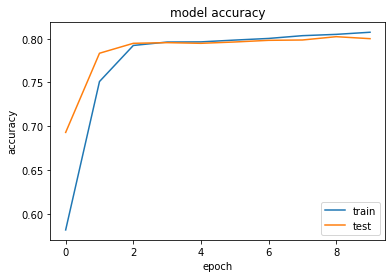

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


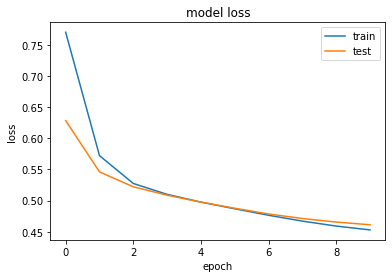

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [26]:
# Predicting the Test set results
ypred = classifier.predict(X_test)
print(ypred)
y_pred = (ypred > 0.5)

[[0.27013642]
 [0.41004926]
 [0.15822777]
 ...
 [0.17847171]
 [0.20936882]
 [0.25254327]]


In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [28]:
cm

array([[1567,   28],
       [ 334,   71]])

In [29]:
score

0.819